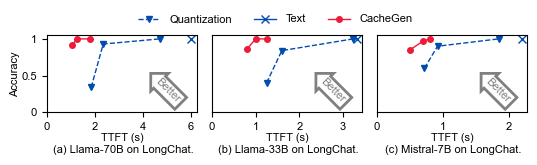

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]
H2O_COLOR = "forestgreen"
LLMLINGUA_COLOR = "violet"
def plot(csv, ax, title, xlabel, type, bottom_title = None,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    lines = []
    lines += [ax.plot(data[f'quant_{type}'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="Quantization", ls="--")]
    if type == "ttft":
        lines += [ax.plot(data[f'text_{type}'], data[f'text_quality'], marker="x", c=BETTER_BASELINE_COLOR, label="Text", markersize=6)]

    lines+=[ax.plot(data[f'cachegen_{type}'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen")]
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        ax.set_ylabel("Accuracy",
                      fontsize=fontsize, labelpad=1)
        ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=fontsize)
    if need_legend >= 0:
        # if type=="size":
        #     ax.legend(loc="upper right", frameon=False,
        #                 bbox_to_anchor=[2.7, 1.4], ncol=4)
        if type=="ttft":
            ax.legend(loc="upper right", frameon=False,
                        bbox_to_anchor=[2.5, 1.4], ncol=4)
    # t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    if xlabel=="TTFT (s)":
        ax.set_xlabel(xlabel + "\n " + bottom_title, labelpad=1)
    else:
        ax.set_xlabel(xlabel, labelpad=1)
    
    ax.set_xlim(left=0)
    # ax.set_xscale("log")

fig, axes = plt.subplots(1, 3, figsize=(6.2, 1))
plt.subplots_adjust(wspace=0.1, hspace=0.6)

cur_type = "size"
# plot('longchat_7B.json', axes[1][3], "Llama-7B", "Size (MB)", type=cur_type, bottom_title="(d) Llama-7B on LongChat.",
#       need_legend=True)
# # plt.text(0.01, 0.01, '(a) Llama-7B on LongChat.', transform=plt.gca().transAxes, ha='left', va='bottom')

# plot('longchat_13B.json', axes[1][2], "Llama-13B", "Size (MB)",bottom_title="(c) Llama-13B on LongChat.", type=cur_type)
# plot('longchat_30B.json', axes[1][1], "Llama-33B", "Size (MB)",bottom_title="(b) Llama-33B on LongChat.",  type=cur_type)
# plot('longchat_70B.json', axes[1][0], "Llama-70B", "Size (MB)", bottom_title="(a) Llama-70B on LongChat.", need_y_label=True,type=cur_type)
for ax in axes:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.1, "Better", ha="right", 
                va="bottom", rotation=-45, bbox=bbox_props, c='grey',
                transform=ax.transAxes)
# for ax in axes[1]:
#     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
#     t = ax.text(0.9, 0.1, "Better", ha="right", 
#                 va="bottom", rotation=-45, bbox=bbox_props, c='grey',
#                 transform=ax.transAxes)

# fig, axes = plt.subplots(1, 4, figsize=(8.2, 1))
# plt.subplots_adjust(wspace=0.1, hspace=0.8)
cur_type = "ttft"
plot('longchat_7B.json', axes[2], "Mistral-7B", "TTFT (s)", type=cur_type, bottom_title="(c) Mistral-7B on LongChat.",)
# plot('longchat_13B.json', axes[2], "Llama-13B", "TTFT (s)", bottom_title="(c) Llama-13B on LongChat.", type=cur_type)
plot('longchat_30B.json', axes[1], "Llama-33B", "TTFT (s)", bottom_title="(b) Llama-33B on LongChat.", type=cur_type)
plot('longchat_70B.json', axes[0], "Llama-70B", "TTFT (s)", bottom_title="(a) Llama-70B on LongChat.", need_y_label=True, type=cur_type,    need_legend=True)

# for ax in axes:
#     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
#     t = ax.text(0.9, 0.1, "Better", ha="right", 
#                 va="bottom", rotation=-45, bbox=bbox_props, c='grey',
#                 transform=ax.transAxes)
fig.savefig("fig-e2e-longchat.pdf", bbox_inches="tight", transparent=True)

In [5]:
1572/345

4.556521739130435

In [51]:
491*8/3000+0.35

1.659333333333333

In [27]:
4.7/1.6

2.9375

In [326]:
length = 4500
print(length * 8192 * 160 * 2 /1e6)
print(length * 8192 * 160 * 2 / 1e6 *8 /3000 + 0.3)

ratio = 0.36

print(length * 8192 * 160* 2 /1e6/2*ratio)
print(length * 8192 * 160* 2 /1e6/2*ratio*8/3000 + 0.3)

11796.48
31.757279999999998
2123.3664
5.9623104


In [289]:
(1500/9400)*15000

2393.617021276596

In [274]:
length = 1500
print(length * 4096 * 64 * 2 /1e6)
print(length *  4096 * 64  * 2 / 1e6 *8 /3000 + 0.3)

786.432
2.3971519999999997


In [253]:
6000*0.65

3900.0

In [228]:
1500/9500*6000

947.3684210526316

In [339]:
length = 1500
print(length * 7168 * 120 * 2 /1e6)
print(length * 7168 * 120 * 2 / 1e6 *8 /3000 + 0.3)

ratio = 0.37

print(length * 7168 * 120* 2 /1e6/2*ratio)
print(length * 7168 * 120* 2 /1e6/2*ratio*8/3000 + 0.3)

2580.48
7.18128
477.3888
1.5730368000000001


In [209]:
3686.8 * 8/ 3000 + 0.3

10.131466666666668

In [9]:
638*0.375

239.25

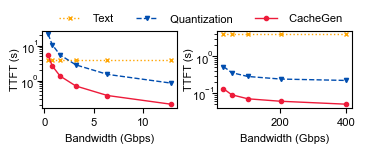

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd
import matplotlib.patches as mpatches

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=3

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

fig, axes = plt.subplots(1, 2, figsize=(4, 1))
fig.subplots_adjust(wspace=0.3)
color = ["orange", WORSE_BASELINE_COLOR, SYS_COLOR]
style = ["x:", "v--", "o-"]




ax = axes[0]
context_len = pd.read_csv("throughput.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=None)
ax.set_ylabel("TTFT (s)", labelpad=0)
# ax.set_ylim(0.05, 100)
ax.set_yscale("log")
# ax.set_xscale("log")
ax.tick_params(axis="y", which="both", pad=-1)
ax.set_xlabel("Bandwidth (Gbps)")

ax = axes[1]
context_len = pd.read_csv("throughput2.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=None)
ax.set_ylabel("TTFT (s)", labelpad=-2)
# ax.set_xlim(8)
# ax.set_ylim((0, 10))
# ax.set_ylim(0.01, 12)
ax.set_yscale("log")
ax.tick_params(axis="y", which="both", pad=-1)
ax.set_xlabel("Bandwidth (Gbps)")
ax.legend(loc="upper right", bbox_to_anchor=[1, 1.35], frameon=False, ncol=3)
# ax.axhline(y=0.2, color='black', linestyle='--')

fig.savefig("fig-sens-bw.pdf", bbox_inches="tight", transparent=True)


In [15]:
32000*1024*64/1e9

2.097152

In [18]:
1024*160*16000/1e9

2.62144

In [31]:
for i in [0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 100.4, 200.8, 400]:
    # print(1.05*8/i+0.2)
    print((1.05/4)*8/i + 0.05)

5.3
2.675
1.3625
0.70625
0.378125
0.2140625
0.13203125
0.091015625
0.07091633466135458
0.06045816733067729
0.05525


In [20]:
310*8/3000

0.8266666666666667